In [ ]:
# para carregar o pacote arules
install.packages("arules")

In [16]:
library(arules)

Question 7

Transform the bigger categories, like age into groups.

In [55]:
data("AdultUCI")

head(AdultUCI)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
,<int>,<fct>,<int>,<ord>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<ord>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,small


In [50]:
summary(AdultUCI$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.64   48.00   90.00 

Convertendo o conjunto em dados qualitativos

In [56]:
AdultUCI$age <- cut(AdultUCI$age, breaks = c(15, 25, 45, 65, 100),
                    labels = c("Young", "Middle-aged", "Senior", "Old"),
                    right = FALSE)

# Categoria para 'hours-per-week'
AdultUCI$"hours-per-week" <- cut(AdultUCI$"hours-per-week",
                             breaks = c(0, 25, 40, 60, 168),
                             labels = c("Part-time", "Full-time", "Over-time", "Work-Aholic"),
                             right = FALSE)


head(AdultUCI)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
,<fct>,<fct>,<int>,<ord>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<ord>
1,Middle-aged,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,Over-time,United-States,small
2,Senior,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,Part-time,United-States,small
3,Middle-aged,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,Over-time,United-States,small
4,Senior,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,Over-time,United-States,small
5,Middle-aged,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,Over-time,Cuba,small
6,Middle-aged,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,Over-time,United-States,small


In [57]:
summary(AdultUCI$"capital-gain")

unique(AdultUCI$`capital-gain`)

print(typeof(AdultUCI$"capital-gain"))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0    1079       0   99999 

[1]  2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
 [13]  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
 [25]  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
 [37]  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 [49] 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
 [61]   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
 [73]  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
 [85]  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
 [97]  3887  5721  9562  1455  2036  1831 11678  2936  2993  7443  6360  1797
[109]  1173  4687  6723  2009  6097  2653  1639 18481  7978  2387  5060  1264
[121]  7262  1731  6612

[1] "integer"


In [62]:
# Categoria para 'capital-gain'
mediana_gain <- median(AdultUCI$"capital-gain")
# as duas medianas são xero
AdultUCI$`capital-gain` <- cut(
  AdultUCI$`capital-gain`,
  breaks = c(-Inf, 0, median(AdultUCI$`capital-gain`[AdultUCI$`capital-gain` > 0], na.rm = TRUE), Inf),
  labels = c("None", "Low", "High"),
  right = FALSE
)

# Categoria para 'capital-loss'
mediana_loss <- median(AdultUCI$"capital-loss")
AdultUCI$`capital-loss` <- cut(
  AdultUCI$`capital-loss`,
  breaks = c(-Inf, 0, median(AdultUCI$`capital-loss`[AdultUCI$`capital-loss` > 0], na.rm = TRUE), Inf),
  labels = c("None", "Low", "High"),
  right = FALSE
)

In [64]:
head(AdultUCI, 10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
,<fct>,<fct>,<int>,<ord>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<ord>
1,Middle-aged,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,Low,Low,Over-time,United-States,small
2,Senior,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,Low,Low,Part-time,United-States,small
3,Middle-aged,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,Low,Low,Over-time,United-States,small
4,Senior,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,Low,Low,Over-time,United-States,small
5,Middle-aged,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Low,Low,Over-time,Cuba,small
6,Middle-aged,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,Low,Low,Over-time,United-States,small
7,Senior,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Low,Low,Part-time,Jamaica,small
8,Senior,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,Low,Low,Over-time,United-States,large
9,Middle-aged,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,High,Low,Over-time,United-States,large


In [73]:
adults <- as(AdultUCI, "transactions")

adults

Warning message:
"Column(s) 2, 4 not logical or factor. Applying default discretization (see '? discretizeDF')."


transactions in sparse format with
 48842 transactions (rows) and
 107 items (columns)

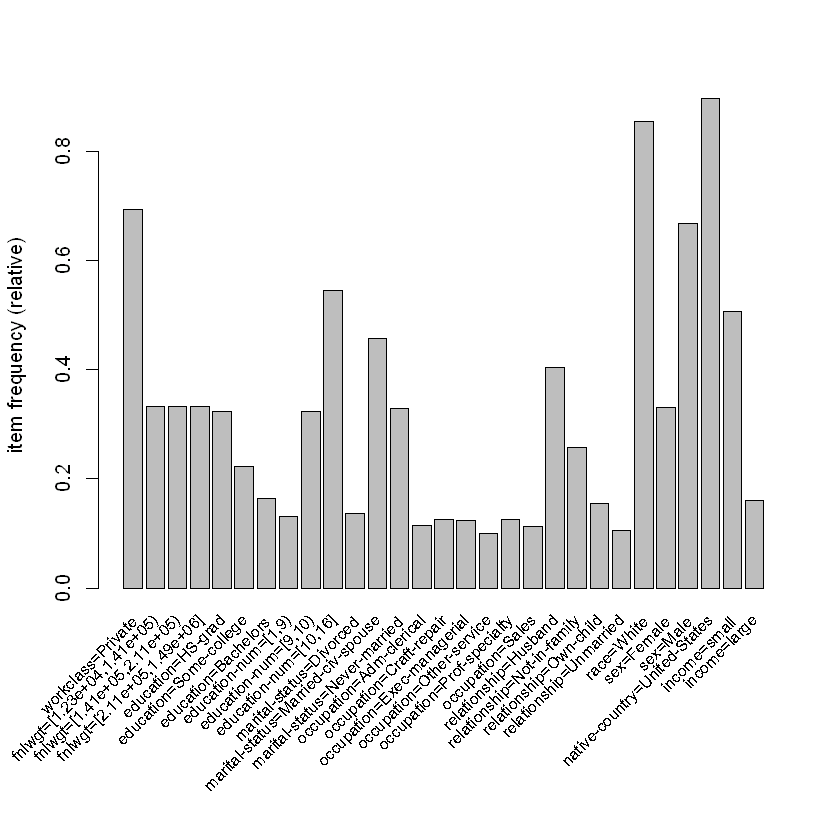

In [75]:
itemFrequencyPlot(adults, support = 0.1, cex.names=0.8)

Extrair os conjuntos de itens frequentes com o algoritmo Apriori:

In [ ]:
params <- list(support = 0.1, confidence = 0.8, minlen = 2, maxlen=100, target="frequent itemsets") 
itemsets <- apriori(adults, parameter = params)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4884 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[107 item(s), 48842 transaction(s)] done [0.02s].
sorting and recoding items ... [29 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 5 6 7 done [0.02s].
writing ... [1184 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [79]:
inspect(itemsets[1:2])

    lhs                   rhs                            support   confidence
[1] {occupation=Sales} => {race=White}                   0.1005282 0.8920785 
[2] {occupation=Sales} => {native-country=United-States} 0.1039679 0.9226017 
    coverage  lift     count
[1] 0.1126899 1.043314 4910 
[2] 0.1126899 1.028055 5078 


In [80]:
# Ordenar pelo suporte e visualizar os 50 primeiros
sorted_itemsets <- sort(itemsets, by="support", decreasing=TRUE)
inspect(sorted_itemsets[1:50])

     lhs                                     rhs                                   support confidence  coverage      lift count
[1]  {race=White}                         => {native-country=United-States}      0.7881127  0.9217231 0.8550428 1.0270761 38493
[2]  {native-country=United-States}       => {race=White}                        0.7881127  0.8781940 0.8974243 1.0270761 38493
[3]  {workclass=Private}                  => {native-country=United-States}      0.6171942  0.8890757 0.6941976 0.9906971 30145
[4]  {sex=Male}                           => {native-country=United-States}      0.5983170  0.8950383 0.6684820 0.9973412 29223
[5]  {workclass=Private}                  => {race=White}                        0.5942427  0.8560137 0.6941976 1.0011355 29024
[6]  {sex=Male}                           => {race=White}                        0.5883256  0.8800919 0.6684820 1.0292957 28735
[7]  {workclass=Private,                                                                                

In [82]:
# Extraindo conjuntos fechados
itemsetC <- apriori(adults, parameter=list(target="closed frequent itemsets", support=0.1, confidence=0.8, minlen=2))

# Comparar o número de conjuntos
length(itemsets)
length(itemsetC)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5     0.1      2
 maxlen                   target  ext
     10 closed frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4884 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[107 item(s), 48842 transaction(s)] done [0.02s].
sorting and recoding items ... [29 item(s)] done [0.00s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 5 6 7 done [0.02s].
filtering closed item sets ... done [0.00s].
sorting transactions ... done [0.01s].
writing ... [551 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


[1] 1184

[1] 551

Verificar se os conjuntos fechados são um subconjunto dos conjuntos frequentes:

Listar os conjuntos de itens que contêm o item income=large e analisar os inconvenientes de não trabalhar com apenas os conjuntos fechados.

In [ ]:
# Listar os conjuntos que contêm 'income=large'
income_large <- subset(itemsets, items %in% "income=large")
inspect(income_large)

In [83]:
# Ordenar por suporte e listar os 30 primeiros
sorted_income_large <- sort(income_large, by="support", decreasing=TRUE)
inspect(sorted_income_large[1:30])

ERROR: Error in h(simpleError(msg, call)): erro na avaliação do argumento 'x' na seleção do método para a função 'sort': 'objeto 'income_large' não encontrado'


In [ ]:
# Listar conjuntos com 'income=small'
income_small <- subset(itemsets, items %in% "income=small")
sorted_income_small <- sort(income_small, by="support", decreasing=TRUE)
inspect(sorted_income_small[1:30])